# Notebook imports

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [64]:
TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEATURE_MATRIX = 'SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'
VOCAB_SIZE = 2500

# Load the Data

In [3]:
x_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
y_test  = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')

prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')


# Calculating the Joint probability 
### Set the Prior

$$P(Spam \, | \, x) = \frac{P(x| \, Spam \,) \, P(Spam)}{P(X)}$$

In [69]:
PROB_SPAM = 0.310

## Joint probability in log format

In [70]:
joint_log_spam = x_test.dot(np.log(prob_token_spam)- np.log(prob_all_tokens))+ np.log(PROB_SPAM)
joint_log_ham = x_test.dot(np.log(prob_token_ham)- np.log(prob_all_tokens))+ np.log(1-PROB_SPAM)

In [71]:
joint_log_ham.size

5737

In [72]:
joint_log_spam[:5]

array([-1.17118298, -1.17118298, -1.17118298, -1.17118298, -1.17118298])

# Making Predictions

### Checking for the higher joint probability

$$P(Spam \, | \, x) \, > \, P(Ham \, | \, x)$$
<center>**OR**</center>
<br>

$$P(Spam \, | \, x) \, < \, P(Ham \, | \, x)$$

In [73]:
prediction = joint_log_spam > joint_log_ham

## Simplify

In [74]:
joint_log_spam = x_test.dot(np.log(prob_token_spam) )+ np.log(PROB_SPAM)
joint_log_ham = x_test.dot(np.log(prob_token_ham) )+ np.log(1-PROB_SPAM)
prediction = joint_log_spam > joint_log_ham

In [75]:
prediction[:5]

array([False, False, False, False, False])

In [76]:
y_test[:5]

array([0., 0., 0., 0., 0.])

# Metrics and evaluation
### Accuracy

In [77]:
correct_docs = (y_test == prediction).sum()
print('Docs classified correctly', correct_docs)
numdocs_wrong = x_test.shape[0]- correct_docs
print('Docs classified incorrectly', numdocs_wrong)


Docs classified correctly 5148
Docs classified incorrectly 589


In [78]:
# Accuracy
correct_docs/ len(x_test)

0.8973331009238278

In [79]:
fraction_wrong = numdocs_wrong /len(x_test)
print('Fraction classified incorrectly is {:.2%}'.format(fraction_wrong))
print('Accuracy of the model is {:.2%}'.format(1-fraction_wrong))

Fraction classified incorrectly is 10.27%
Accuracy of the model is 89.73%


## Visualising our results

In [80]:
# Chart Styling Info
yaxis_label = 'P(x| Spam)'
xaxis_label = 'P(x| Nonspam)'

In [81]:
df_describe = pd.DataFrame(joint_log_spam)
df_describe.describe()

,0
count,4.013000e+03
mean,-1.171183e+00
std,5.884915e-14
min,-1.171183e+00
25%,-1.171183e+00
50%,-1.171183e+00
75%,-1.171183e+00
max,-1.171183e+00


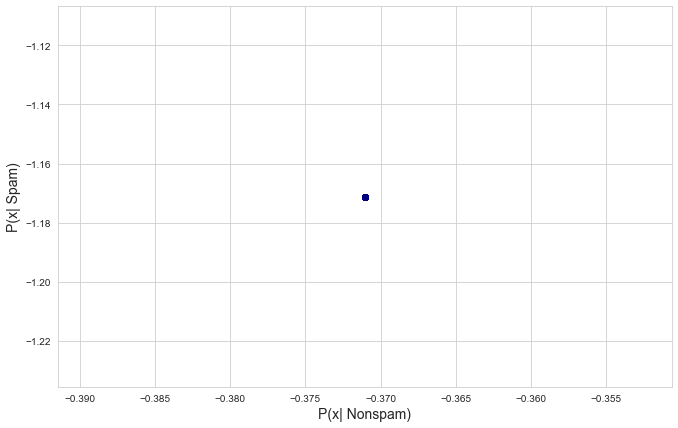

In [82]:
plt.figure(figsize=(11,7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)
plt.scatter(joint_log_ham, joint_log_spam, color='navy')
plt.show()

In [47]:
sns.set_style('whitegrid')
labels= 'Actual Category'

summary_df= pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label:joint_log_ham, labels: y_test})

c:\Users\Diana C Contreras\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


AttributeError: module 'seaborn' has no attribute 'plot'

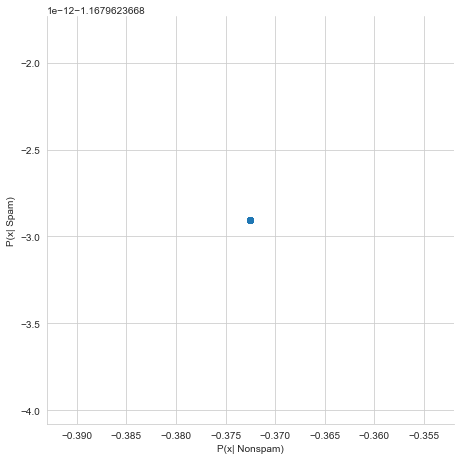

In [49]:
sns.lmplot(x=xaxis_label, y= yaxis_label, data=summary_df,size=6.5)
sns.plot.show()

### False Positives and False Negatives

In [52]:
np.unique(prediction, return_counts=True)

(array([False]), array([5737], dtype=int64))

In [58]:
true_pos= (y_test==1) & (prediction==1)

In [60]:
false_pos= (y_test==0) & (prediction==1)
false_neg= (y_test==1) & (prediction==0)
true_neg= (y_test==0) & (prediction==0)

## Recal score

In [62]:
recall_score= true_pos.sum()/ (true_pos.sum()+ false_neg.sum())
print('Recall score is {:.2%}'.format(recall_score))

Recall score is 0.00%


In [68]:
x_test.shape

(5737, 2500)